/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hyperparameters:
Learning Rate: Not explicitly set in this example (using default Adam optimizer)
Number of Batches: Not explicitly set (using batch size 800)
Batch Size: 800
Number of Convolutional Layers: 1
Number of Filters/Kernels: 32
Kernel Size: (1, 1)
Stride: Not explicitly set (using default)
Padding: Not explicitly set (using default)
Pooling Type: MaxPooling2D
Pooling Size: (1, 1)
Activation Function: ReLU
Dropout Rate: 0.5
Optimizer: Adam
Loss Function: Sparse Categorical Crossentropy
Input Shape: (1, 1, 8)
Epoch 1/10
1/1 [==============================] - 17s 17s/step - loss: 1.6694 - accuracy: 0.2250 - val_loss: 1.7353 - val_accuracy: 0.0500
Epoch 2/10
1/1 [==============================] - 0s 80ms/step - loss: 1.6391 - accuracy: 0.2500 - val_loss: 1.6985 - val_accuracy: 0.0875
Epoch 3/10
1/1 [==============================] - 0s 83ms/step - loss: 1.5860 - accuracy: 0.2271 - val_loss: 1.6632 - val_accuracy: 0.1750
Epoch 4/10
1/1 [==============================] - 0s 72ms/s

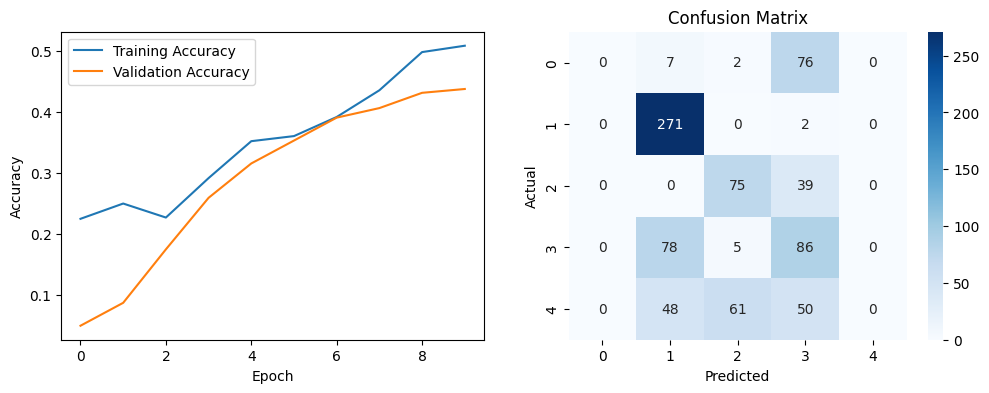

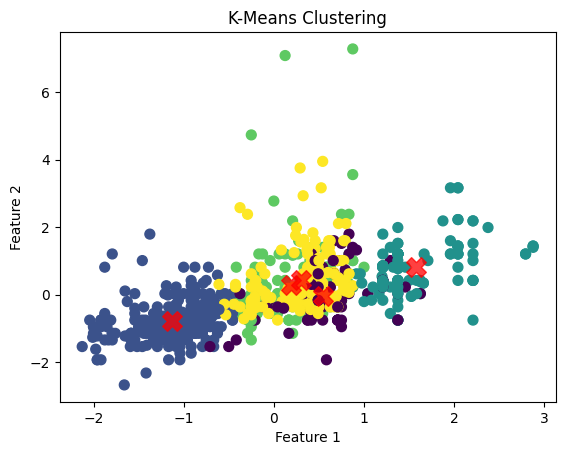

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Pokemon dataset
# Assuming the dataset is loaded into a pandas DataFrame named 'pokemon_data'
# Drop irrelevant columns like 'Name', 'Type 1', 'Type 2', and 'Legendary'
pokemon_data = pd.read_csv('/content/Pokemon.csv')
pokemon_data = pokemon_data.drop(columns=['Name', 'Type 1', 'Type 2', 'Legendary'])

# Encode categorical columns (if needed)
le = LabelEncoder()
pokemon_data['Generation'] = le.fit_transform(pokemon_data['Generation'])

# Normalize numerical columns
scaler = StandardScaler()
pokemon_data.iloc[:, 1:] = scaler.fit_transform(pokemon_data.iloc[:, 1:])

# Split the data into features (X) and labels (y)
X = pokemon_data.iloc[:, 1:]

# Apply K-Means clustering on the features
n_clusters = 5  # Update to the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Reshape the data for CNN input
X_kmeans = X.values.reshape(X.shape[0], 1, 1, -1)

# Convert labels to integers
y_int = kmeans_labels.astype(int)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(1, 1, X_kmeans.shape[-1])))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_clusters, activation='softmax'))

# Print hyperparameters
print("Hyperparameters:")
print("Learning Rate: Not explicitly set in this example (using default Adam optimizer)")
print(f"Number of Batches: Not explicitly set (using batch size {X_kmeans.shape[0]})")
print(f"Batch Size: {X_kmeans.shape[0]}")
print("Number of Convolutional Layers: 1")
print("Number of Filters/Kernels: 32")
print("Kernel Size: (1, 1)")
print("Stride: Not explicitly set (using default)")
print("Padding: Not explicitly set (using default)")
print("Pooling Type: MaxPooling2D")
print("Pooling Size: (1, 1)")
print("Activation Function: ReLU")
print("Dropout Rate: 0.5")
print("Optimizer: Adam")
print("Loss Function: Sparse Categorical Crossentropy")
print(f"Input Shape: {X_kmeans.shape[1:]}")

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

history = model.fit(X_kmeans, y_int, epochs=10, batch_size=X_kmeans.shape[0], validation_split=0.4)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Evaluate the model on the test set
y_pred = model.predict(X_kmeans)
y_pred_classes = np.argmax(y_pred, axis=1)

# Visualize confusion matrix
cm = confusion_matrix(y_int, y_pred_classes)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_int), yticklabels=np.unique(y_int))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Visualize K-Means Clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [21]:
import seaborn as sns


In [10]:
kmeans_labels = kmeans.labels_
print("Unique K-Means Labels:", np.unique(kmeans_labels))


Unique K-Means Labels: [0 1 2 3 4]


In [8]:
kmeans_labels -= kmeans_labels.min()


In [19]:
from sklearn.metrics import confusion_matrix


In [14]:
pip install matplotlib seaborn


In [16]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Hyperparameters:
Learning Rate: 0.001
Number of Batches: 100
Batch Size: 64
Number of Convolutional Layers: 2
Number of Filters/Kernels: [96, 256]
Kernel Size: (1, 1)
Stride: (1, 1)
Pooling Size: (1, 1)
Activation Function: relu
Input Shape: (1, 1, 4)
Epoch 1/100
8/8 [==============================] - 6s 622ms/step - loss: 1.8159 - accuracy: 0.2000 - val_loss: 1.7710 - val_accuracy: 0.2125
Epoch 2/100
8/8 [==============================] - 6s 668ms/step - loss: 1.7809 - accuracy: 0.2021 - val_loss: 1.7525 - val_accuracy: 0.2000
Epoch 3/100
8/8 [==============================] - 4s 515ms/step - loss: 1.7533 - accuracy: 0.2167 - val_loss: 1.7514 - val_accuracy: 0.2062
Epoch 4/100
8/8 [==============================] - 5s 605ms/step - loss: 1.7386 - accuracy: 0.2208 - val_loss: 1.7464 - val_accuracy: 0.2125
Epoch 5/100
8/8 [==============================] - 6s 705ms/step - loss: 1.7159 - accuracy: 0.2604 - val_loss: 1.7730 - val_accuracy: 0.2188
Epoch 6/100
8/8 [==========================

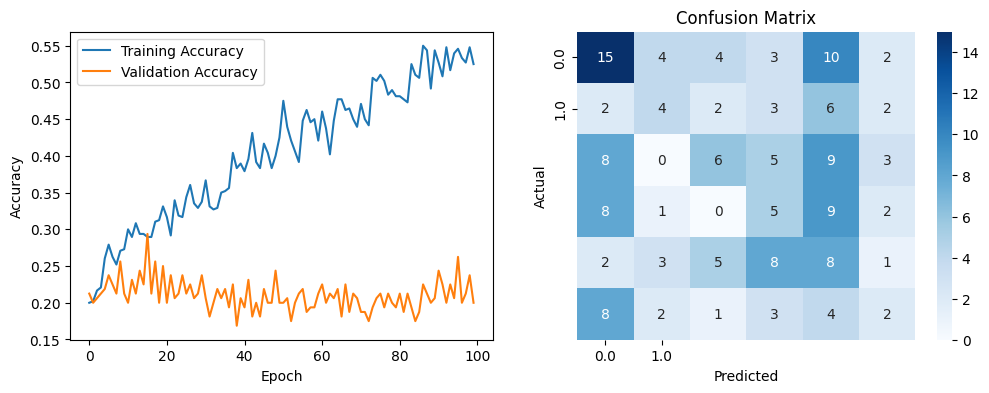

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your Pokémon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')  # Replace with the actual path to your dataset

# Select features for the CNN
features = ['HP', 'Attack', 'Defense', 'Speed']

# Extract features and labels
X = pokemon_data[features]
y = pokemon_data['Generation']  # Assuming 'Type 1' is the target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target variable
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_onehot = onehot_encoder.fit_transform(integer_encoded)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_onehot, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape the data for CNN input
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 1, X_train.shape[1])
X_val_cnn = X_val.reshape(X_val.shape[0], 1, 1, X_val.shape[1])
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 1, X_test.shape[1])

# Define the number of classes
num_classes = len(np.unique(y))

# Define hyperparameters
learning_rate = 0.001
num_batches = 100
batch_size = 64
num_conv_layers = 2
num_filters = [96, 256]
kernel_size = (1, 1)
stride = (1, 1)
pooling_size = (1, 1)
activation_function = 'relu'
input_shape = (1, 1, X_train_cnn.shape[-1])

# Build AlexNet model
model = Sequential()

# Convolutional layers
for i in range(num_conv_layers):
    model.add(Conv2D(filters=num_filters[i], kernel_size=kernel_size, strides=stride,
                     activation=activation_function, input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=pooling_size))
    model.add(Dropout(0.25))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation=activation_function))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(4096, activation=activation_function))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(1000, activation=activation_function))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Print hyperparameters
print("Hyperparameters:")
print(f"Learning Rate: {learning_rate}")
print(f"Number of Batches: {num_batches}")
print(f"Batch Size: {batch_size}")
print(f"Number of Convolutional Layers: {num_conv_layers}")
print(f"Number of Filters/Kernels: {num_filters}")
print(f"Kernel Size: {kernel_size}")
print(f"Stride: {stride}")
print(f"Pooling Size: {pooling_size}")
print(f"Activation Function: {activation_function}")
print(f"Input Shape: {input_shape}")

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=num_batches, batch_size=batch_size, validation_data=(X_val_cnn, y_val))

# Visualize the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Evaluate the model on the test set
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Visualize confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Hyperparameters:
Learning Rate: 0.001
Number of Batches: 100
Batch Size: 64
Number of LSTM Layers: 2
Number of LSTM Units: 50
Dropout Rate: 0.5
Optimizer: adam
Loss Function: categorical_crossentropy
Input Shape: (1, 4)
Epoch 1/100
8/8 [==============================] - 6s 84ms/step - loss: 5.2966 - accuracy: 0.0208 - val_loss: 5.2934 - val_accuracy: 0.0437
Epoch 2/100
8/8 [==============================] - 0s 18ms/step - loss: 5.2891 - accuracy: 0.0375 - val_loss: 5.2878 - val_accuracy: 0.0437
Epoch 3/100
8/8 [==============================] - 0s 25ms/step - loss: 5.2791 - accuracy: 0.0437 - val_loss: 5.2792 - val_accuracy: 0.0437
Epoch 4/100
8/8 [==============================] - 0s 21ms/step - loss: 5.2633 - accuracy: 0.0417 - val_loss: 5.2657 - val_accuracy: 0.0437
Epoch 5/100
8/8 [==============================] - 0s 20ms/step - loss: 5.2387 - accuracy: 0.0542 - val_loss: 5.2422 - val_accuracy: 0.0437
Epoch 6/100
8/8 [==============================] - 0s 23ms/step - loss: 5.1933 -

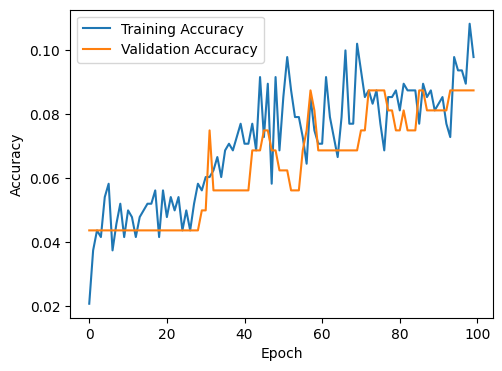

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Select features for the LSTM
features = ['HP', 'Attack', 'Defense', 'Speed']
X = pokemon_data[features]
y = pokemon_data['Total']  # Assuming 'Total' is the target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target variable
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_onehot = onehot_encoder.fit_transform(integer_encoded)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_onehot, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape the data for LSTM input
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_lstm = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define hyperparameters
learning_rate = 0.001
num_batches = 100
batch_size = 64
num_lstm_layers = 2
num_lstm_units = 50
dropout_rate = 0.5
optimizer = 'adam'
loss_function = 'categorical_crossentropy'
input_shape = (1, X_train_lstm.shape[2])  # Adjust input shape based on your data

# Build LSTM model
model = Sequential()

# LSTM layers
for i in range(num_lstm_layers):
    model.add(LSTM(units=num_lstm_units, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(dropout_rate))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout_rate))

# Output layer
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Adjust output size based on your classes

# Print hyperparameters
print("Hyperparameters:")
print(f"Learning Rate: {learning_rate}")
print(f"Number of Batches: {num_batches}")
print(f"Batch Size: {batch_size}")
print(f"Number of LSTM Layers: {num_lstm_layers}")
print(f"Number of LSTM Units: {num_lstm_units}")
print(f"Dropout Rate: {dropout_rate}")
print(f"Optimizer: {optimizer}")
print(f"Loss Function: {loss_function}")
print(f"Input Shape: {input_shape}")

# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=num_batches, batch_size=batch_size,
                    validation_data=(X_val_lstm, y_val))

# Visualize the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Evaluate the model on the test set
y_pred = model.predict(X_test_lstm)
y_pred_classes = np.argmax(y_pred, axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344:

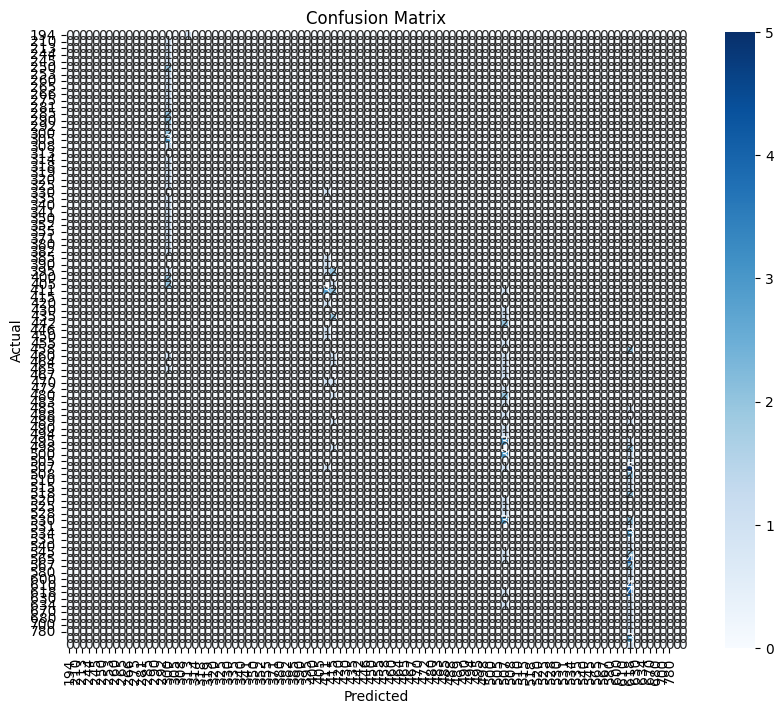

Classification Report:
              precision    recall  f1-score   support

         194       0.00      0.00      0.00         1
         210       0.00      0.00      0.00         0
         213       0.00      0.00      0.00         0
         244       0.00      0.00      0.00         0
         245       0.00      0.00      0.00         0
         250       0.00      0.00      0.00         0
         253       0.00      0.00      0.00         0
         260       0.00      0.00      0.00         0
         265       0.00      0.00      0.00         0
         266       0.00      0.00      0.00         0
         275       0.00      0.00      0.00         0
         281       0.00      0.00      0.00         0
         285       0.00      0.00      0.00         0
         290       0.00      0.00      0.00         0
         292       0.00      0.00      0.00         0
         300       0.00      0.00      0.00         0
         305       0.00      0.00      0.00         0
    

In [44]:
from sklearn.metrics import classification_report

# ...

# Visualize confusion matrix with classification report
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
report = classification_report(np.argmax(y_test, axis=1), y_pred_classes, labels=unique_classes)

# Using Seaborn for a better-looking heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Hyperparameters:
Learning Rate: 0.001
Number of Batches: 100
Batch Size: 32
Number of Convolutional Layers: 2
Number of Filters/Kernels: [96, 256]
Kernel Size: (1, 1)
Stride: (1, 1)
Pooling Size: (1, 1)
Activation Function: relu
Input Shape: (1, 4)
Optimizer: adam
Loss Function: categorical_crossentropy
Epoch 1/20
16/16 [==============================] - 4s 59ms/step - loss: 0.6729 - accuracy: 0.5801 - val_loss: 0.6246 - val_accuracy: 0.7500
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5866 - accuracy: 0.8477 - val_loss: 0.5467 - val_accuracy: 0.8438
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5059 - accuracy: 0.8945 - val_loss: 0.4765 - val_accuracy: 0.8984
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.4332 - accuracy: 0.9082 - val_loss: 0.4102 - val_accuracy: 0.9219
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.3663 - accuracy: 0.9277 - val_loss: 0.3501 - val_accuracy: 0

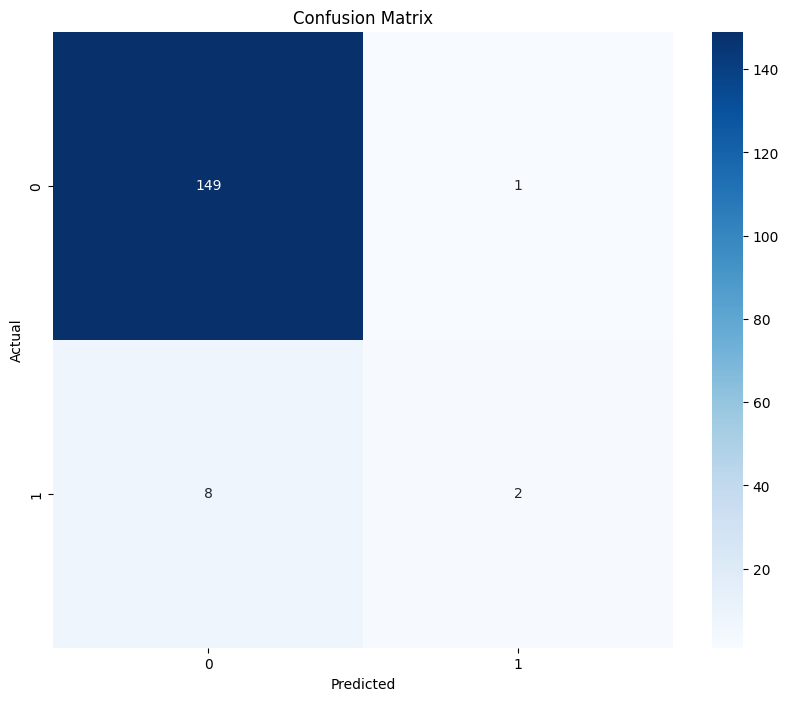

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.67      0.20      0.31        10

    accuracy                           0.94       160
   macro avg       0.81      0.60      0.64       160
weighted avg       0.93      0.94      0.93       160



In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load Pokemon dataset (replace '/path/to/pokemon.csv' with the actual path)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Select features and target variable
features = ['HP', 'Attack', 'Defense', 'Speed']
target = 'Legendary'

X = pokemon_data[features]
y = pokemon_data[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target variable
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_onehot = onehot_encoder.fit_transform(integer_encoded)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

# Reshape the data for GRU input
X_train_gru = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define hyperparameters
learning_rate = 0.001
num_epochs = 20
batch_size = 32
dropout_rate = 0.2

# Build the GRU model
model = Sequential()
model.add(GRU(units=50, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
model.add(Dropout(dropout_rate))
model.add(Dense(2, activation='softmax'))

# Print hyperparameters
# Print hyperparameters
print("Hyperparameters:")
print(f"Learning Rate: {learning_rate}")
print(f"Number of Batches: {num_batches}")
print(f"Batch Size: {batch_size}")
print(f"Number of Convolutional Layers: {num_conv_layers}")
print(f"Number of Filters/Kernels: {num_filters}")
print(f"Kernel Size: {kernel_size}")
print(f"Stride: {stride}")
print(f"Pooling Size: {pooling_size}")
print(f"Activation Function: {activation_function}")
print(f"Input Shape: {input_shape}")
print(f"Optimizer: {optimizer}")
print(f"Loss Function: {loss_function}")

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_gru, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test_gru)
y_pred_classes = np.argmax(y_pred, axis=1)

# Visualize confusion matrix with classification report
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
unique_classes = np.unique(np.argmax(y_test, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
report = classification_report(np.argmax(y_test, axis=1), y_pred_classes, labels=unique_classes)
print("Classification Report:")
print(report)


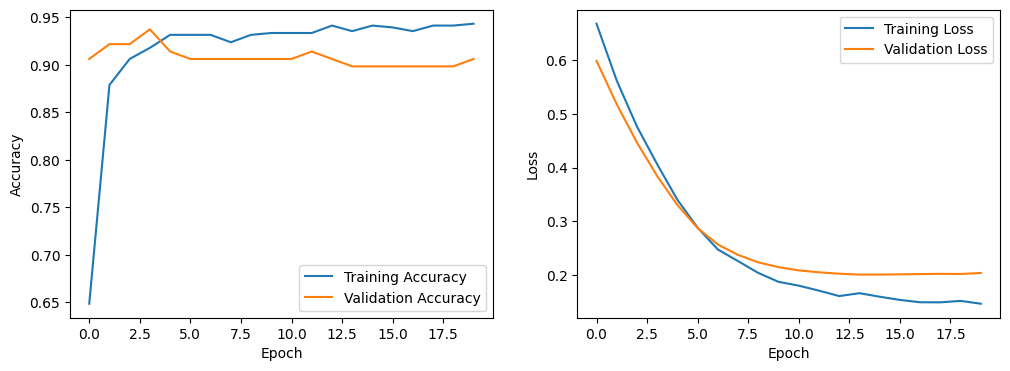

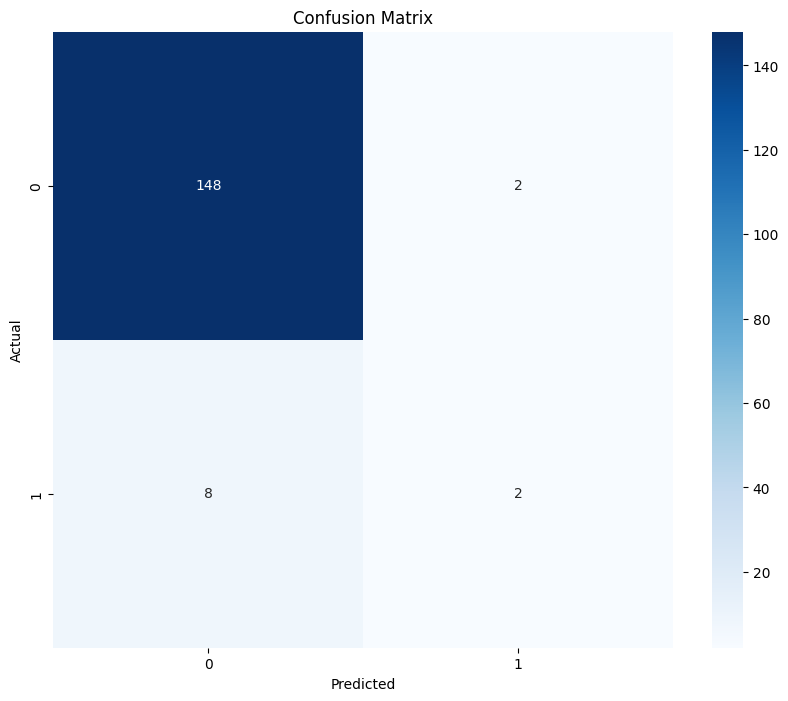

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.50      0.20      0.29        10

    accuracy                           0.94       160
   macro avg       0.72      0.59      0.63       160
weighted avg       0.92      0.94      0.92       160



In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize training history
plt.figure(figsize=(12, 4))

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Visualize confusion matrix with classification report
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
unique_classes = np.unique(np.argmax(y_test, axis=1))

plt.figure(figsize=(10, 8))

# Using Seaborn for a better-looking heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
report = classification_report(np.argmax(y_test, axis=1), y_pred_classes, labels=unique_classes)
print("Classification Report:")
print(report)
